## 瞬时频率
- 连续
  - 定义：解析信号相位的导数，仅适用于单分量信号，因此需要对输入信号做滤波处理，只保留周期成分
$$
x_a(t) = x(t) + j \mathcal{H}[x(t)] = x(t) + j x_h(t) = a(t) e^{j \phi(t)}, \quad \phi(t) = arg[x_a(t)] \\
x_h(t) = x(t) * h(t) = x(t) * \frac{1}{\pi t}
$$
  - 希尔伯特变换：$\mathcal{H}[x(t)] = x_h(t)$

- 离散
  - 定义：同连续
$$
x_a(n) = x(n) + j \mathcal{H}[x(n)] = x(n) + j x_h(n) = a(n) e^{j \phi(n)}, \quad \phi(n) = arg[x_a(t=n)] \\
x_h(n) = x(n) * h(n) = x(n) * \frac{1}{\pi n}
$$
Hilbert变换的表达式实际上就是将原始信号和一个信号做卷积的结果。这个用来卷积的信号就是$h(t) = \frac{1}{\pi t}$。因此，Hilbert变换可以看成是将原始信号通过一个滤波器，或者一个系统，这个系统的冲击响应为$h(t)$。
  - 离散希尔伯特变换(DHT)：$\mathcal{H}[x(n)] = x_h[n]$
  - 解析信号相位的导数：
    - 向前求导：$w_f[n] = \lim_{\Delta n \rightarrow 1} \frac{\phi[n + \Delta n] - \phi[n]}{\Delta n} = \phi[n+1] - \phi[n]$
    - 向后求导：$w_f[n] = \lim_{\Delta n \rightarrow 1} \frac{\phi[n] - \phi[n - \Delta n]}{\Delta n} = \phi[n] - \phi[n-1]$
    - 向前求导：$w_f[n] = \lim_{\Delta n \rightarrow 1} \frac{\phi[n + \Delta n] - \phi[n - \Delta n]}{2 \Delta n} = \frac{\phi[n+1] - \phi[n-1]}{2}$

## 带通滤波器
$$
G(z; n) = \frac{1 - \beta}{1 - \beta e^{j w[n]} z^{-1}}
$$
  - $w[n]$：预估的中心频率
  - $\beta$：决定带宽


## z变换

### 离散信号的z变换和拉普拉斯变换的联系
连续信号$f(t)$，经过采样周期为T的采样开关后，离散的脉冲序列函数，即采样信号为
$$f^{*}(t) = \sum_{n=0}^\infty f(nT) \delta(t - nT)$$
对其进行拉普拉斯变化得到
$$F^{*}(s) = \mathcal{F}[f^{*}(t)] = \int_{0}^\infty f^{*}(t) e^{-s t} \mathrm{d}t = \sum_{n=0}^\infty f(nT) \int_{0}^\infty \delta(t - nT)) e^{-s t} \mathrm{d}t = \sum_{n=0}^\infty f(nT) e^{-s nT}$$
变量替换$z = e^{Ts}$，得到离散信号$f^{*}(t)$的z变换
$$\mathcal{Z}[f^{*}(t)] = X(z) = \sum_{n=0}^\infty f(nT) z^{-n} = \sum_{n=0}^\infty x[n] z^{-n}$$
总结：从序列的拉普拉斯变换到z变换，即由复变量s平面到z平面的映射变换，映射关系为$z = e^{Ts}$

### z变换滞后定理: $\mathcal{Z}[f(t - kT)] = z^{-k} X(z)$
证明：连续信号$f(t - kT)$，经过采样周期为T的采样开关后，离散的脉冲序列函数，即采样信号为
$$f^{*}(t - kT) = \sum_{n=k}^\infty f(nT - kT) \delta(t - nT)$$
对其进行拉普拉斯变化得到
$$F^{*}(s) = \mathcal{F}[f^{*}(t - kT)] = \int_{0}^\infty f^{*}(t - kT) e^{-s t} \mathrm{d}t = \sum_{n=k}^\infty f(nT - kT) \int_{0}^\infty \delta(t - nT)) e^{-s t} \mathrm{d}t = \sum_{n=k}^\infty f(nT - kT) e^{-s nT}$$
变量替换$z = e^{Ts}$，得到离散信号$f^{*}(t)$的z变换
$$
\begin{align*}
\mathcal{Z}[f^{*}(t - kT)] &= \sum_{n=k}^\infty f(nT - kT) z^{-n} = f(0) z^{-k} + f(T) z^{-(k+1)} + f(2T) z^{-(k+2)} + \cdots \\
&= z^{-k} \left(f(0) + f(T)z^{-1} + f(2T) z^{-2} +  \cdots \right) = z^{-k} \mathcal{Z}(f^{*}(t)) = z^{-k} X(z)
\end{align*}
$$

### z变换超前定理

### 脉冲响应不变法
- $z = e^{sT}$的映射关系反应的是$H_a(s)$的周期延拓与$H(z)$的关系，从$H_a(s)$到$H(z)$没有一个从s平面到z平面的简单代数映射关系
- 数字滤波器的频响也不是简单重现模拟滤波器的频响，而是其周期延拓，周期为$\Omega_s = \frac{2\pi}{T} = 2\pi f_s$，如果模拟滤波器的频响带限于折叠频率$\frac{\Omega_s}{2}$以内，即$H_a(j\Omega) = 0, |\Omega| \ge \frac{\pi}{T}$，数字滤波器的频响才能不失真地重现模拟滤波器的频响（在折叠频率以内），即$|w| < \pi$

### 双线性变换法
通过s和t的简单代数关系，从模拟传递函数通过代数置换得到数字滤波器的传递函数

### 双线性变换法
双线性变换是自然对数函数的一阶估计法，也就是将z平面映射到s平面，当拉普拉斯变换被用在离散时间信号上（将离散时间串行中的每个元素附在对应的延迟狄拉克$\delta$函数），其结果确实为将离散时间串行的Z变换替代成：
$$
z = e^{Ts} = \frac{e^{\frac{Ts}{2}}}{e^{-\frac{Ts}{2}}} = \frac{1 + \frac{1}{2} sT + \cdots}{1 - \frac{1}{2} sT + \cdots} \approx \frac{1 + \frac{1}{2} sT}{1 - \frac{1}{2} sT} = -1 + 2\sum_{n=0}^\infty (\frac{sT}{2})^n
$$
上面用到的幂级数展开
$$
\begin{align*}
\frac{1 + x}{1 - x} &= (1+x) \sum_{n=0}^{\infty} x^n = (1 + x)(1 + x + x^2 + \cdots) = 1 + 2\sum_{n=1}^\infty x^n = -1 + 2\sum_{n=0}^\infty x^n \\
&= \frac{x - 1 + 2}{1 - x} = -1 + 2\frac{1}{1 - x} = -1 + 2\sum_{n=0}^\infty x^n
\end{align*}
$$
其中T是采样间距。上式中分子和分母与s都是线性关系所以叫双线性变换。上述的双线性估计可以产生一个近似估计$s = \frac{1}{T} \ln(z)$
$$
s \approx \frac{2}{T} \frac{1 - z^{-1}}{1 + z^{-1}} = \frac{2}{T} \frac{z - 1}{z + 1} \tag{1}
$$
双线性变换的本质是使用这种一阶估计法且将连续时间传递函数$H_a(s)$中的$s$替换成
$$
H_d(z) = H_a(s)|_{s = \frac{2}{T} \frac{z - 1}{z + 1}} = H_a(\frac{2}{T} \frac{z - 1}{z + 1})
$$

### 消除频谱的混叠
把$s = j \Omega$和$z = e^{j w_d T}$代入双线性变换公式(1)
$$
\begin{align*}
j \Omega &= \frac{2}{T} \frac{e^{jw_dT} - 1}{e^{jw_dT} + 1} = \frac{2}{T} \frac{e^{\frac{jw_dT}{2}} - e^{\frac{-jw_dT}{2}}}{e^{\frac{jw_dT}{2}} + e^{\frac{-jw_dT}{2}}} \\
&= j\frac{2}{T} \frac{\sin{\frac{w_dT}{2}}}{\cos{\frac{w_dT}{2}}} = j\frac{2}{T} \tan{\frac{w_dT}{2}} = \sigma + j\Omega
\end{align*}
$$
可以得到
$$
\Omega = \frac{2}{T} \tan{\frac{w_dT}{2}}, \quad w_d = 2 \arctan{\frac{\Omega T}{2}}
$$
$w$是数字角频率，$\Omega$是模拟角频率，所有的模拟角频率都被压缩到$\pm \pi$之内，但是依然能保持单值对应,虽然消灭了频谱混叠，但是由于出发点是在原点进行泰勒展开做近似的，最后的频谱会存在一定的失真

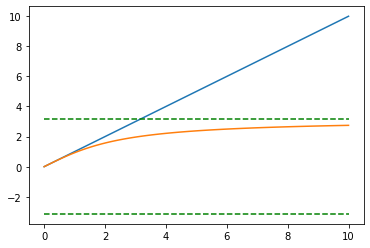

In [19]:
import numpy as np
import matplotlib.pyplot as plt

T = 1
omega = np.linspace(0, 10, 100)
w1 = omega * T
w2 = 2 * np.arctan(omega * T / 2)

plt.plot(omega, w1)
plt.plot(omega, w2)
plt.plot([0, 10], [np.pi, np.pi], '--g')
plt.plot([0, 10], [-np.pi, -np.pi], '--g')

各种频率的定义
- 采样频率$f_s$，单位时间内从连续信号中提取并组成离散信号的采样个数，单位是样本/秒，用赫兹（Hz）来表示，采样间隔$T = \frac{1}{f_s}$
- 模拟频率$f$：每秒经历多少个周期，每个周期是$2\pi$，单位是周期/秒，用赫兹（Hz）来表示，即为通常所说的频率
- 模拟角频率$\Omega$：每秒经历多少弧度，每个周期弧度为$2\pi$，即$\Omega = 2\pi f$，单位是rad/s，没有周期性, $\Omega \in (0, \infty)$
- 数字频率$w_d$：每个采样点间隔之间的弧度，单位rad，经过一个周期需要点的个数为$\frac{2\pi}{w_d} = \frac{2\pi}{\frac{2 \pi f}{f_s}} = \frac{f_s}{f}$，数字角频率相较于模拟角频率而言，具有$2\pi$周期性

数字频率与模拟频率相互转化：一秒种有$f_s$个样本点，总弧度为$f_s w_d = \Omega = 2 \pi f$，于是有
$$
\begin{align*}
w_d &= \frac{\Omega}{f_s} = \frac{2 \pi f}{f_s} \\
&= \Omega T = 2 \pi f T
\end{align*}
$$

表达式
- 模拟频率$f$：$\cos(2\pi f t)$
- 模拟角频率$\Omega$：$\cos(\Omega t)$, $\Omega \in (0, \infty)$
- 数字频率$w_d$：$\cos(w_d n) = \cos(\Omega T n) = \cos(\Omega n T) = \cos(\Omega t) = \cos(2 \pi f t)$

下采样后的等效采样频率满足Nyquist采样定理，否则下采样后的信号会产生混叠
- 因为数字信号对于$\omega$具有周期性，DFT是将数字信号从时间域$n$转为频域$\omega$，因此我们只转为$\omega$在$[-\pi,\pi]$区间内复指数信号的叠加
- $w = \frac{\Omega}{f_s} = \frac{2 \pi f_{max}}{f_s} \le \pi$，得到Nyquist采样定理$f_s \ge 2 f_{max}$

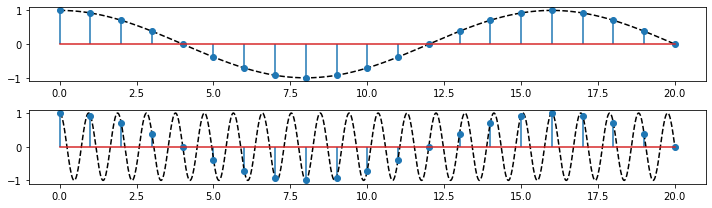

In [20]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 20, 1000)
plt.figure(figsize=(10, 3))
plt.subplot(211)
omega = np.pi / 8
plt.plot(t, np.cos(omega * t), '--k')
n = np.arange(21)
plt.stem(n, np.cos(omega * n))

plt.subplot(212)
omega = np.pi / 8 + 2 * np.pi
plt.plot(t, np.cos(omega * t), '--k')
n = np.arange(21)
plt.stem(n, np.cos(omega * n))

plt.tight_layout()
plt.show()

### IIR滤波器设计-冲激响应不变法
设计指标
- 采样频率$f_s$
- 通带截止频率$f_{pass}$
- 阻带截止频率$f_{stop}$
- 通带最大衰减$\delta_{pass}$
- 阻带最小衰减$\delta_{stop}$

步骤
1. 参数转化，从模拟频率转化成数字角频率
$$
w_{pass} = 2\pi\frac{f_{pass}}{f_s}, \quad w_{stop} = 2\pi \frac{f_{stop}}{f_s}
$$
2. 计算滤波器的阶数N,主要还是根据最大衰减和最小衰减来确定的
滤波器的频率响应（幅值的增益或衰减随频率的变化-波德图）
$$
1
$$

### 差分方程
$$
y(k) + a_1 y(k-1) + \cdots + a_n y(k-n) = b_0 u(k) + b_1 u(k-1) + \cdots + b_m u(k-m) \\
$$
由z变换的滞后定理可得：$\mathcal{Z}[y(k-n)] = z^{-n} Y(z)$，其中$y(k)$为输入离散序列函数，$Y(z) = \mathcal{Z}[y(k)]$为其z变换，因此对上式整个做z变换
$$
(1 + a_1 z^{-1} + \cdots + a_n z^{-n}) Y(z) = (b_0 + b_1 z + \cdots + b_m z^{-m}) U(z)
$$

### 传递函数
线性定常离散系统的z传递函数：在零始条件下离散系统输出与输入序列的z变换之比
$$
G(z) = \frac{Y(z)}{U(z)} = \frac{b_0 + b_1 z + \cdots + b_m z^{-m}}{1 + a_1 z^{-1} + \cdots + a_n z^{-n}}
$$